### Part 1 : Voronoi mesh generation

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import geopandas as gpd
from mf6Voronoi.geoVoronoi import createVoronoi
from mf6Voronoi.geoUtils import plotOrgDistPoints, plotCirclesPoints, plotKeyList


In [3]:
#Create mesh object specifying the coarse mesh and the multiplier
vorMesh = createVoronoi(meshName='trenchExcavation',maxRef = 50, multiplier=1.5)


#Open limit layers and refinement definition layers
vorMesh.addLimit('basin','../../examples/trenchExcavation/Shp/modelAoi.shp')
vorMesh.addLayer('ghb','../../examples/trenchExcavation/Shp/compoundGhb.shp',20)
vorMesh.addLayer('wel','../../examples/trenchExcavation/Shp/pumpingWells.shp',5)
vorMesh.addLayer('drn','../../examples/trenchExcavation/Shp/trenchExcavationDissolved.shp',2)


In [4]:

#Generate point pair array
vorMesh.generateOrgDistVertices()

#Generate the point cloud and voronoi
vorMesh.createPointCloud()
vorMesh.generateVoronoi()



/--------Layer ghb discretization-------/
Progressive cell size list: [20, 50.0] m.

/--------Layer wel discretization-------/
Progressive cell size list: [5, 12.5, 23.75, 40.625] m.

/--------Layer drn discretization-------/
Progressive cell size list: [2, 5.0, 9.5, 16.25, 26.375, 41.5625] m.

/----Sumary of points for voronoi meshing----/
Distributed points from layers: 3
Points from layer buffers: 1329
Points from max refinement areas: 1086
Points from min refinement areas: 245
Total points inside the limit: 2904
/--------------------------------------------/

Time required for point generation: 0.31 seconds 


/----Generation of the voronoi mesh----/

Time required for voronoi generation: 0.09 seconds 



In [5]:
#Export generated voronoi mesh
vorMesh.getVoronoiAsShp(outputPath='output')


/----Generation of the voronoi shapefile----/
The output folder output exists

Time required for voronoi shapefile: 1.61 seconds 



In [6]:
#Export point data and voronoi polygons

outPath = 'output'
#Points
# vorMesh.getPointsAsShp('vertexOrg',outPath+'/vertexOrg.shp')
#vorMesh.getPointsAsShp('vertexDist',outPath+'/vertexDist.shp')
# vorMesh.getPointsAsShp('vertexBuffer',outPath+'/vertexBuffer.shp')
# vorMesh.getPointsAsShp('vertexMaxRef',outPath+'/vertexMaxRef.shp')
# vorMesh.getPointsAsShp('vertexMinRef',outPath+'/vertexMinRef.shp')
# vorMesh.getPointsAsShp('vertexTotal',outPath+'/vertexTotal.shp')
#Polygons

#vorMesh.getPolyAsShp('voronoiRegions',outPath+'/voronoiRegions.shp')


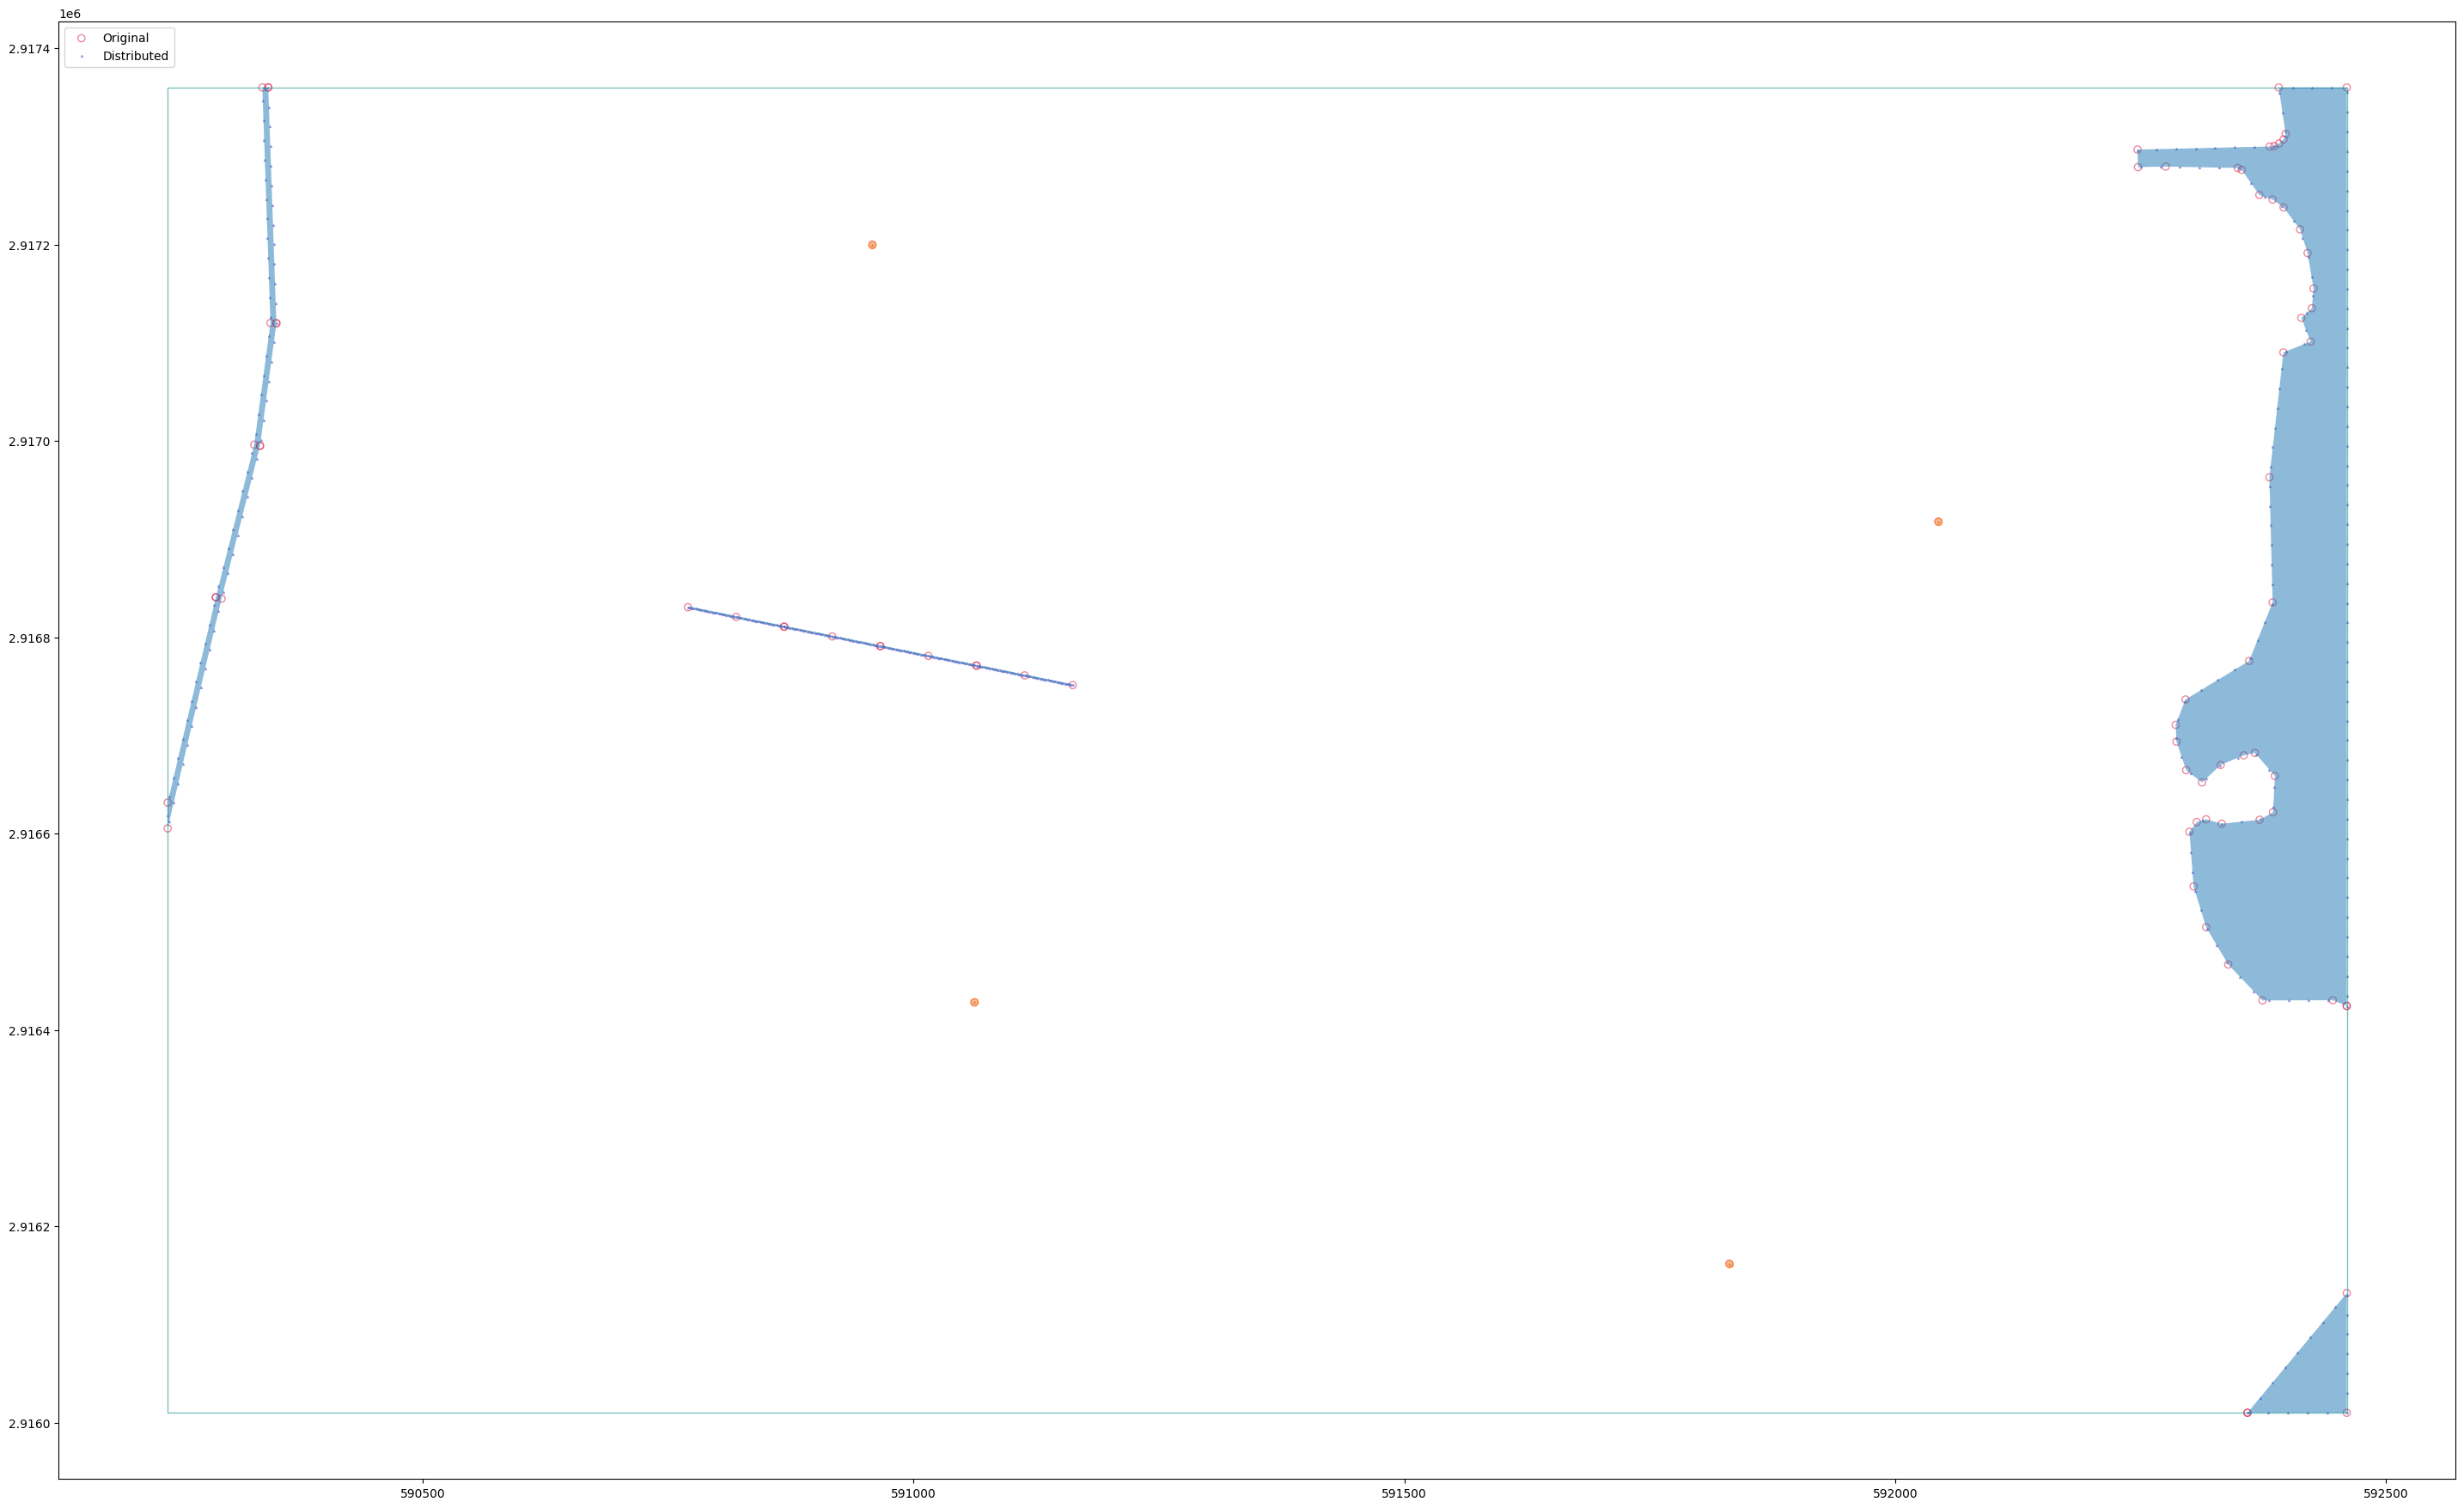

In [7]:
plotOrgDistPoints(vorMesh)


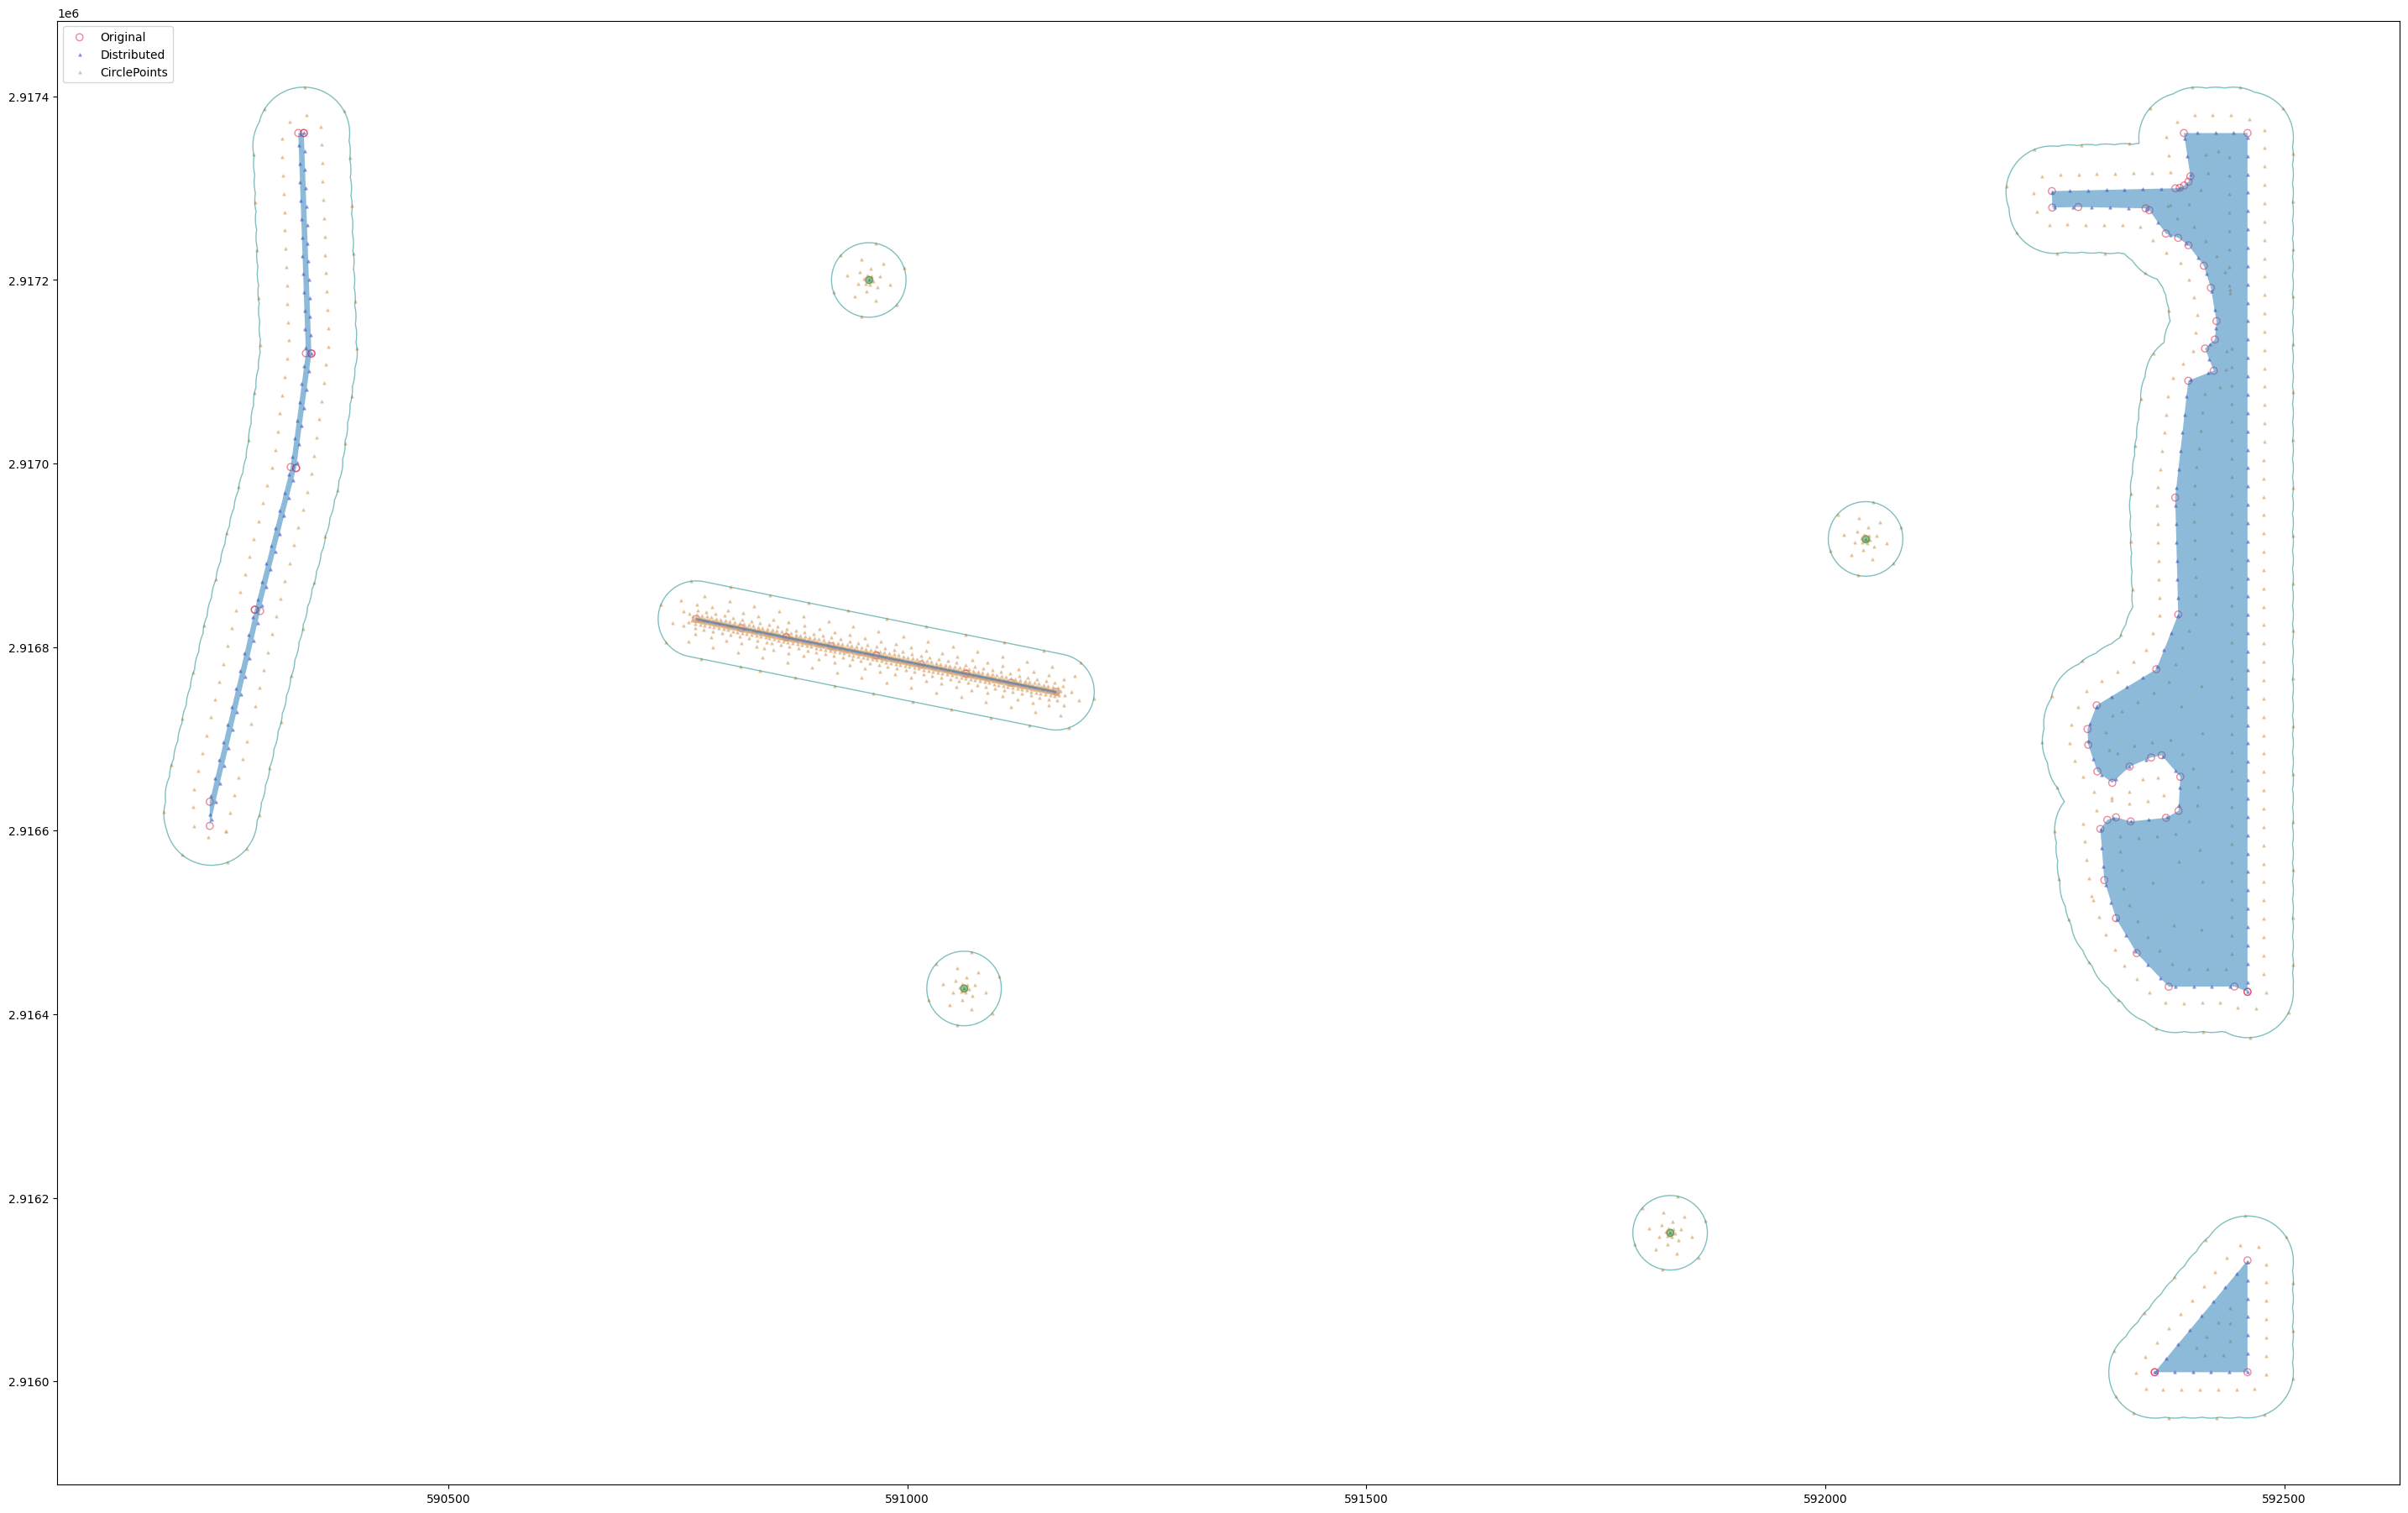

In [8]:
plotCirclesPoints(vorMesh)

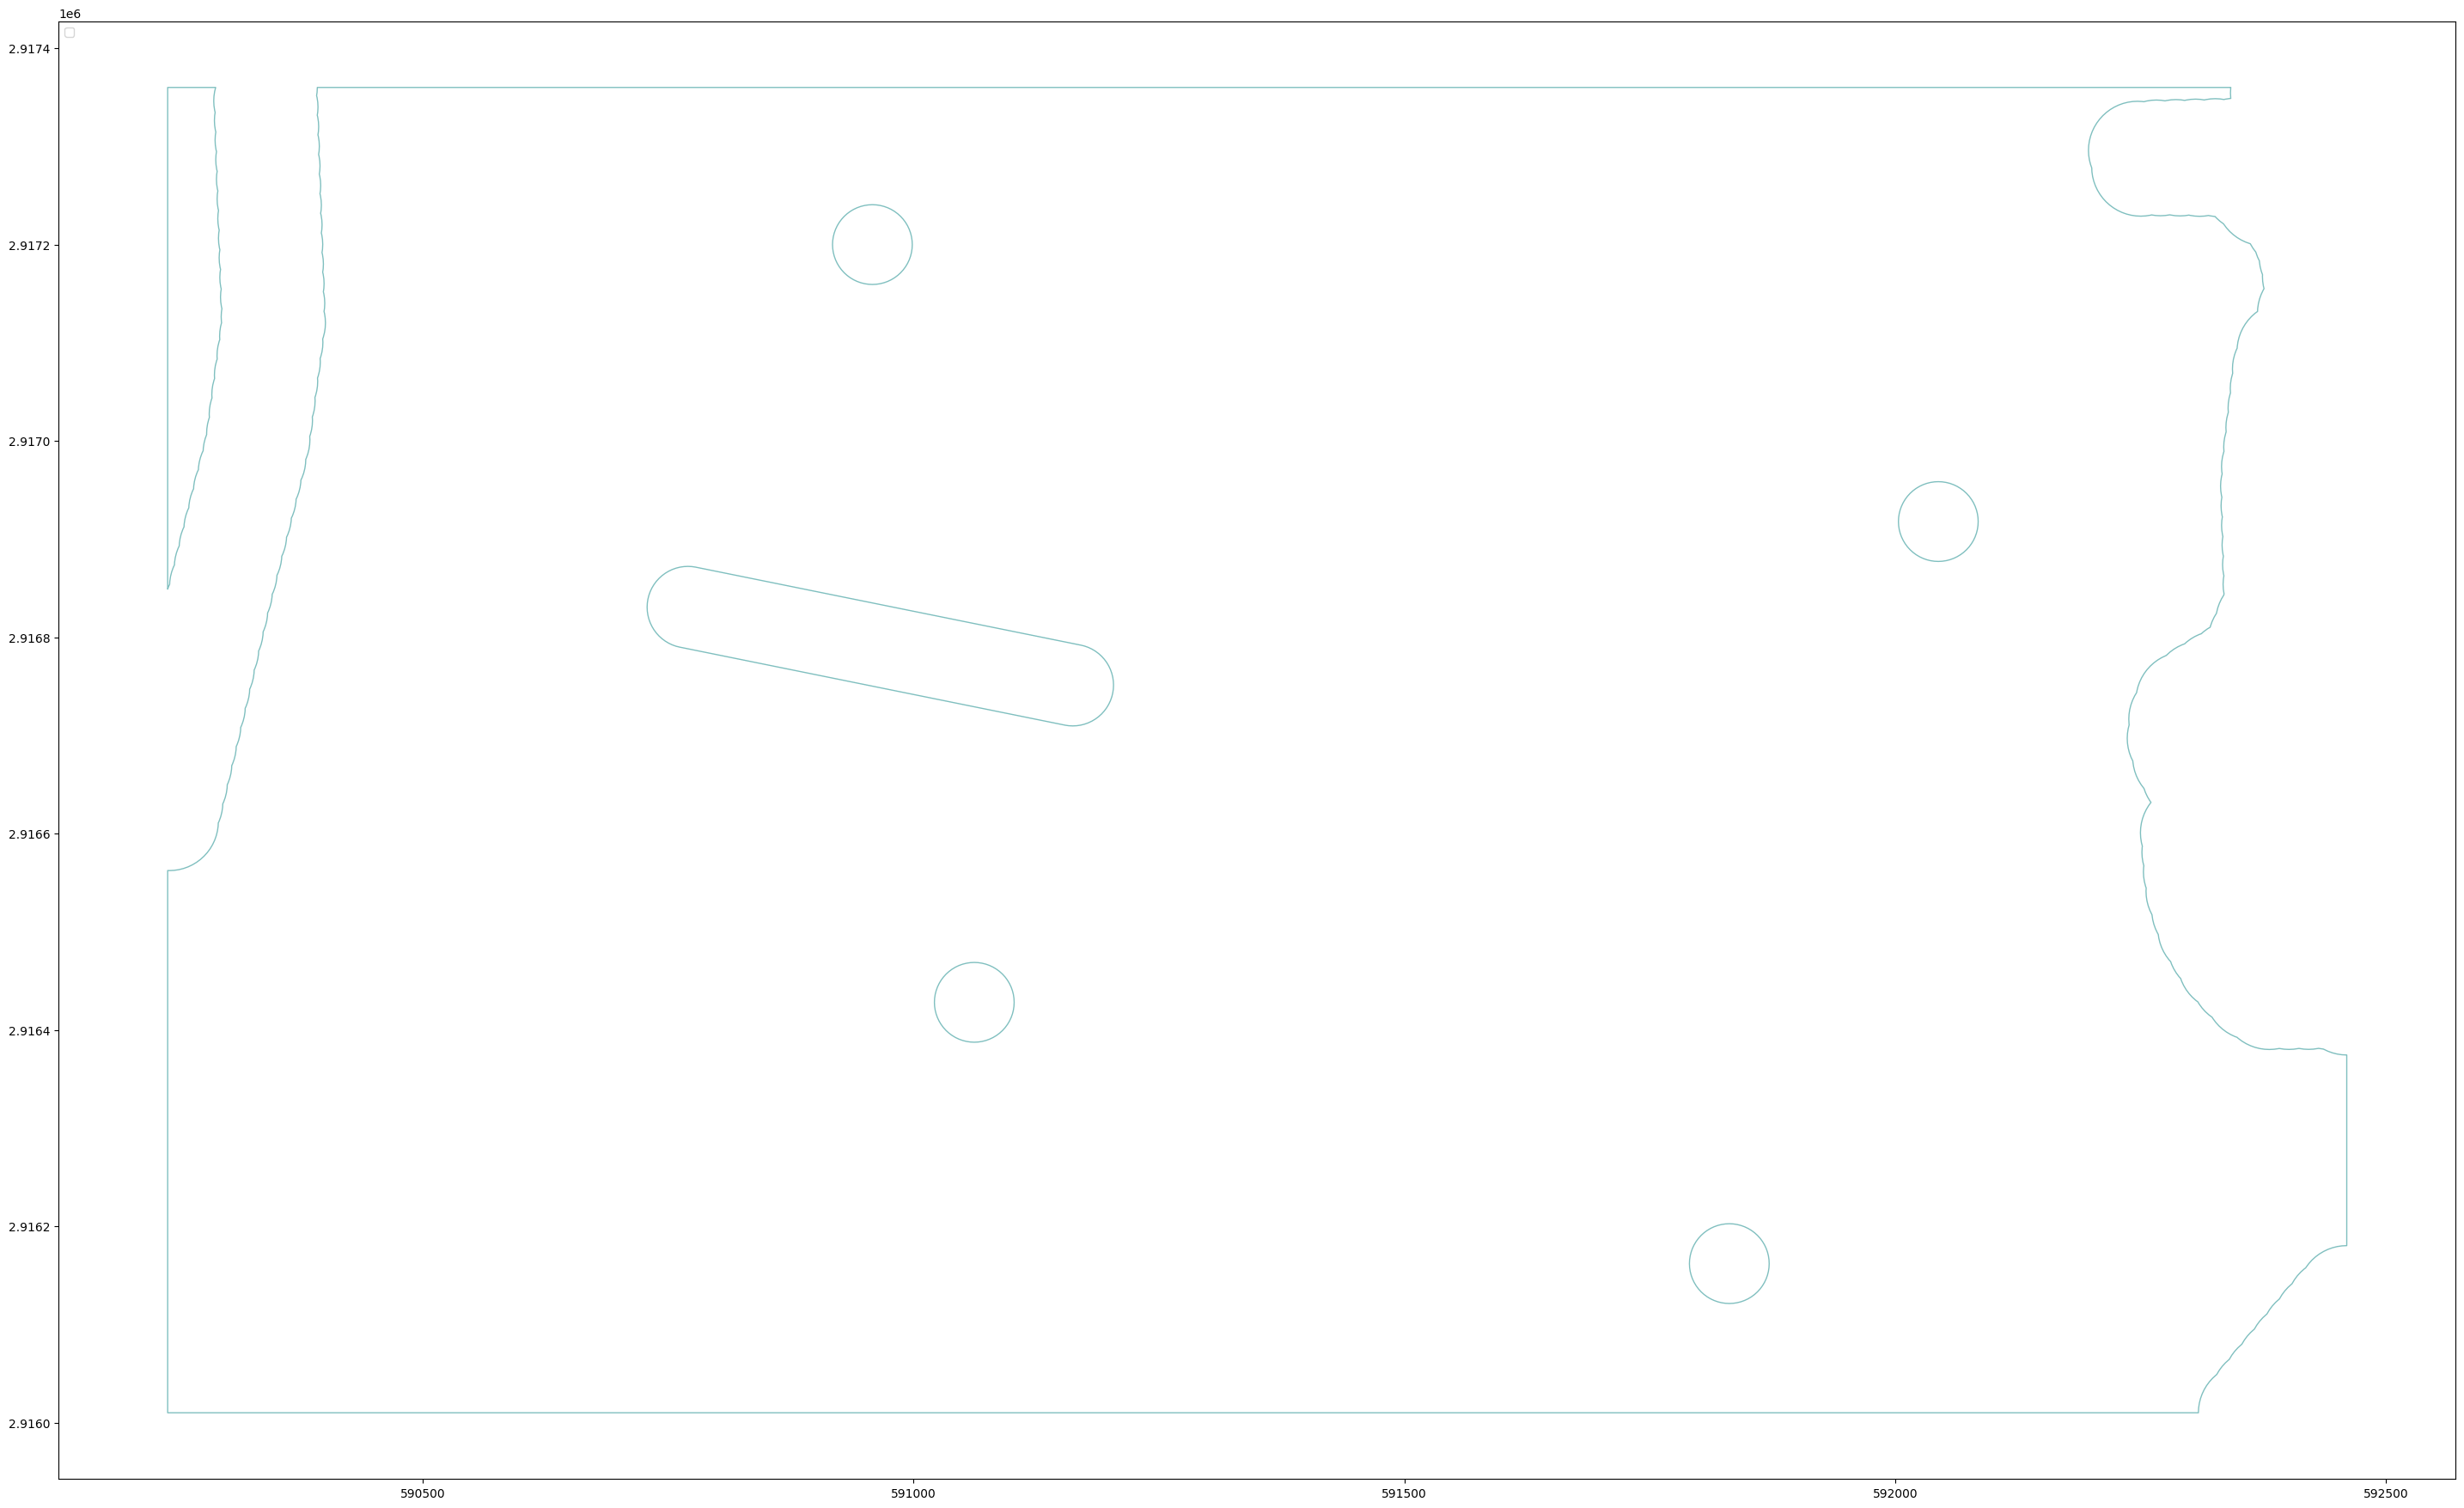

In [9]:
plotKeyList(vorMesh, ['pointsMaxRefPoly'])

<Axes: >

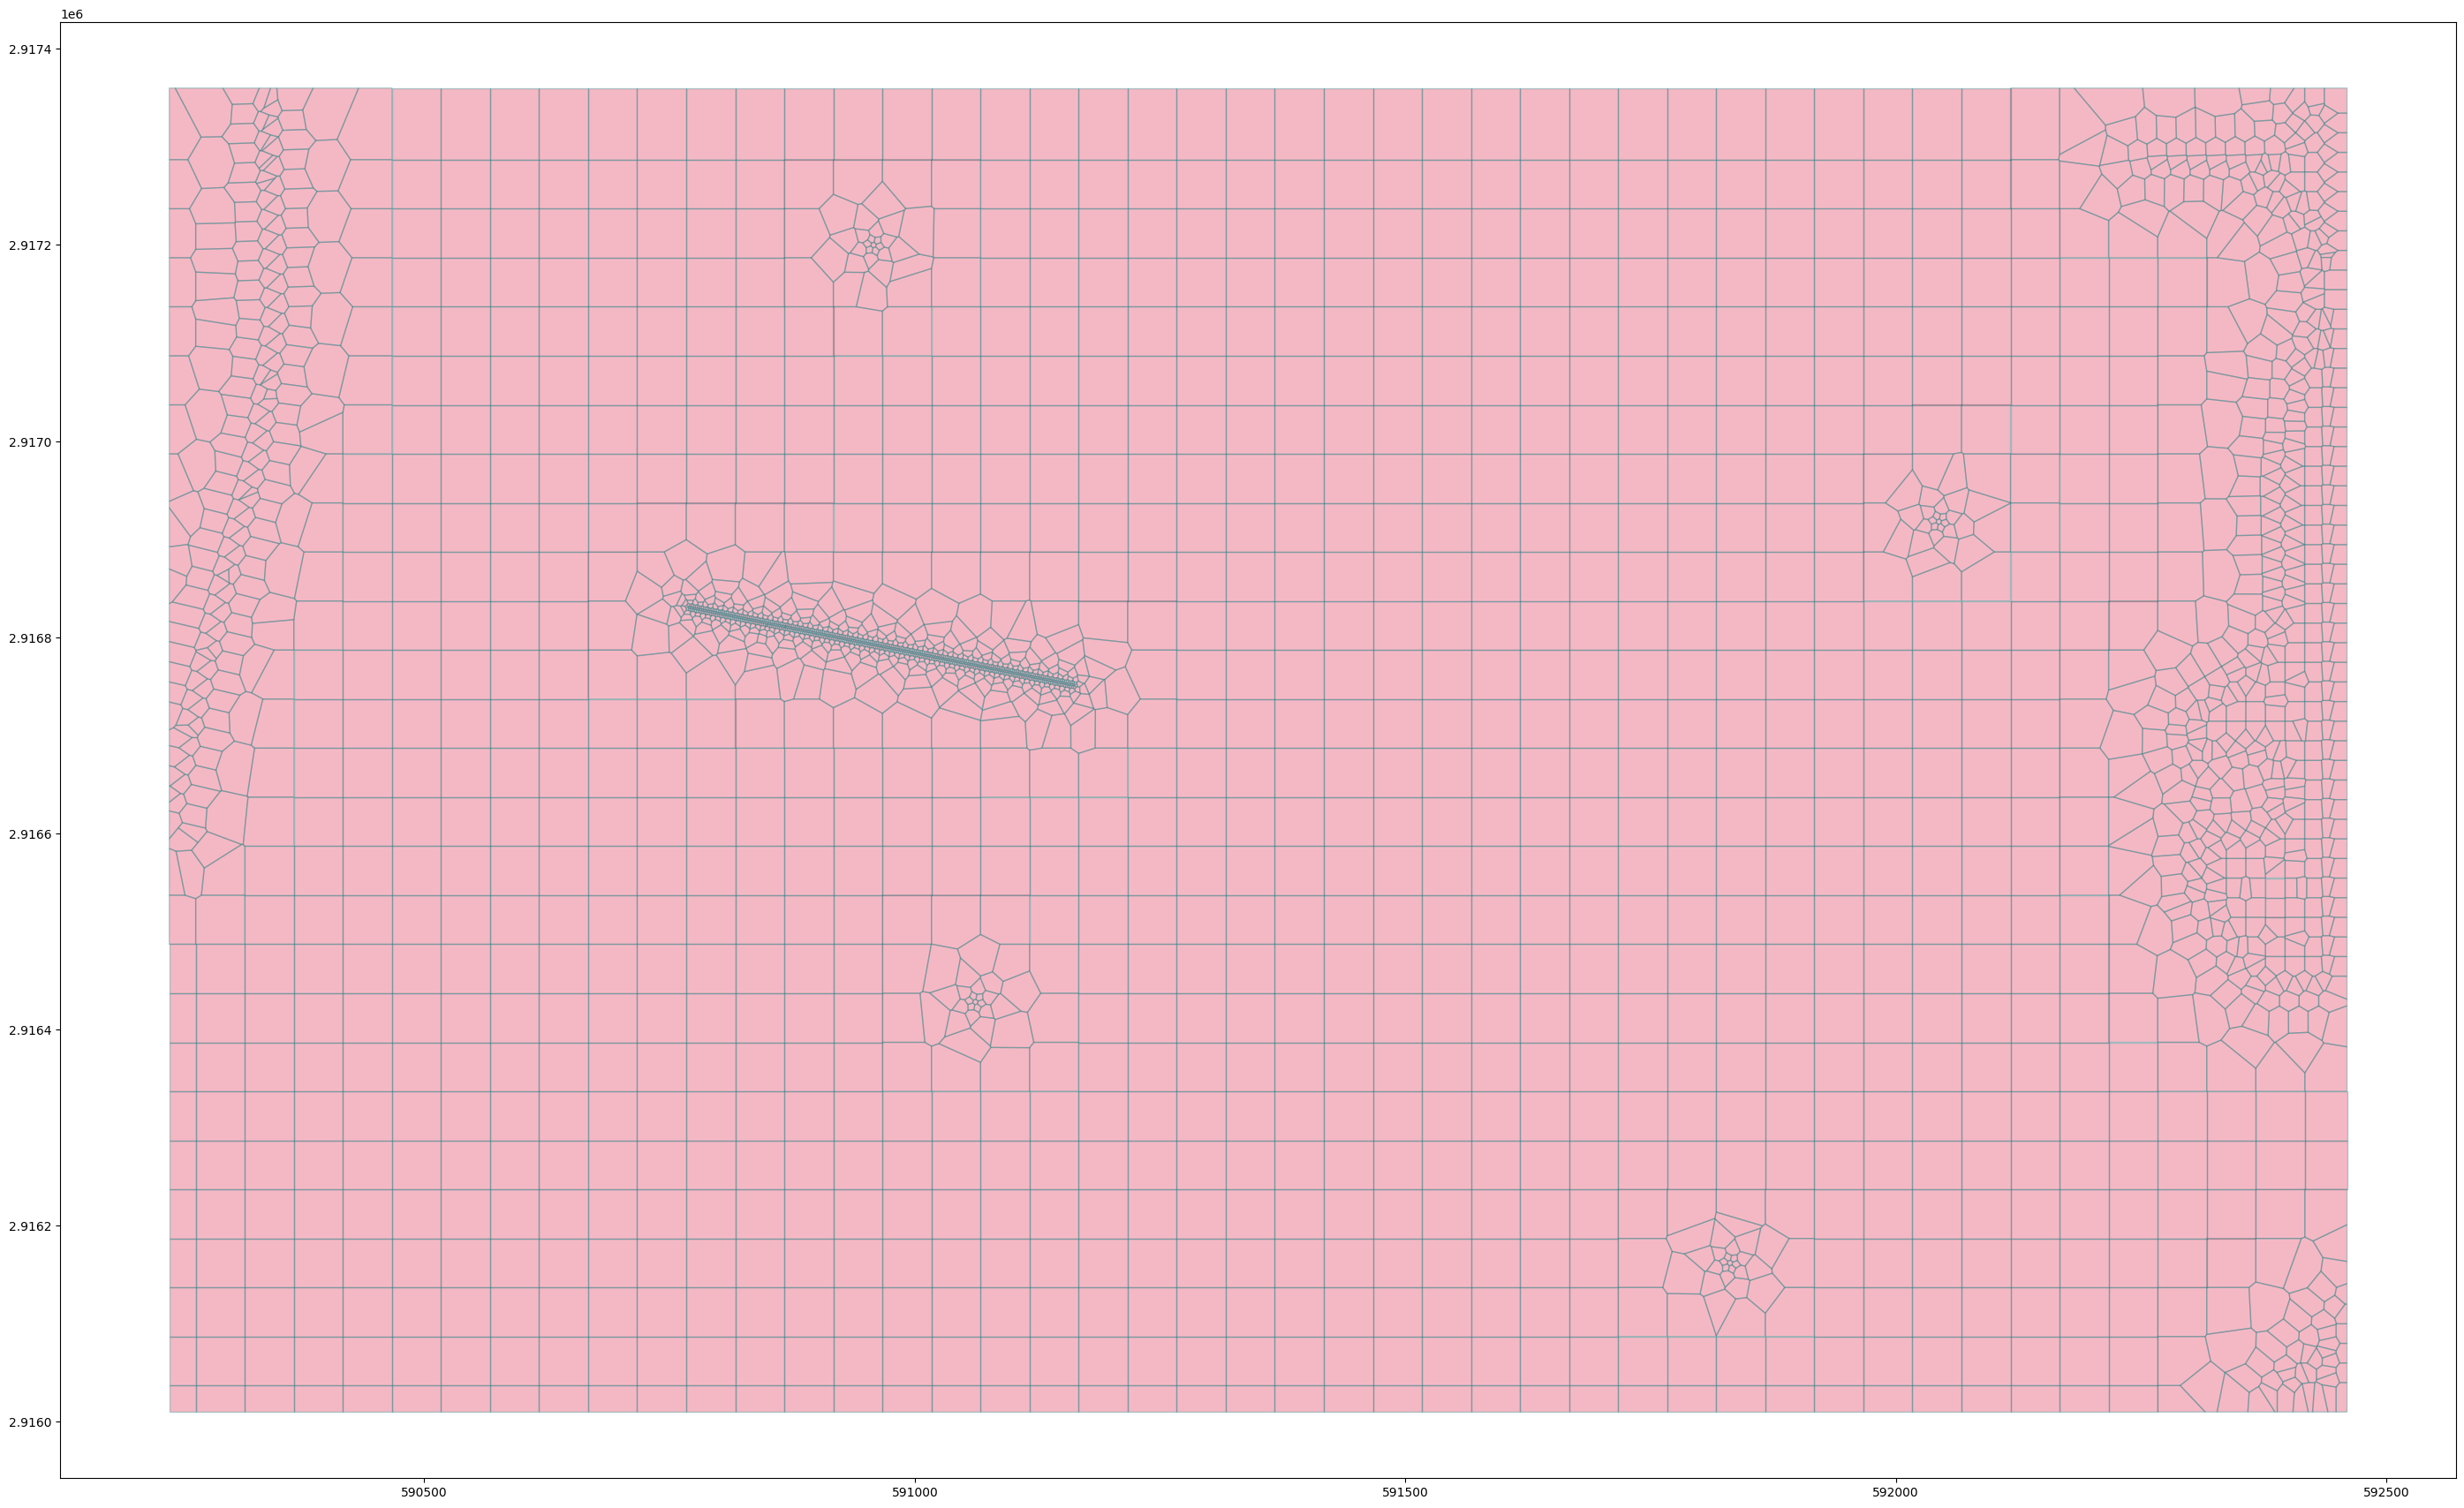

In [10]:
# Show the resulting voronoi mesh

#open the mesh file
mesh=gpd.read_file(outPath+'/'+vorMesh.modelDis['meshName']+'.shp')
#plot the mesh
mesh.plot(figsize=(35,25), fc='crimson', alpha=0.3, ec='teal')